In [1]:
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [3]:
num_epochs = 10
num_classes = 10
learning_rate = 0.001
batch_size = 50
input_size = 784 # 28*28
hidden_layers = 100

In [4]:
train_data = torchvision.datasets.MNIST(root="./dataset", train=True, transform=transforms.ToTensor(), download=True)
test_data = torchvision.datasets.MNIST(root=".dataset", train=False, transform=transforms.ToTensor(), download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=batch_size, shuffle=False, num_workers=2)

In [5]:
checkdata = iter(train_loader)
img, labels = next(checkdata)
print(img.shape, labels.shape)

torch.Size([50, 1, 28, 28]) torch.Size([50])


tensor(3)
tensor(8)
tensor(7)
tensor(9)
tensor(0)
tensor(0)
tensor(3)
tensor(3)
tensor(6)


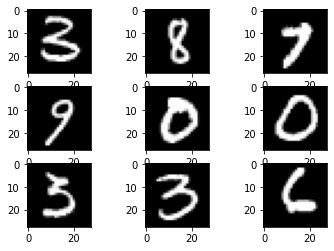

In [6]:
for i in range(9):
    print(labels[i])
    plt.subplot(3, 3, i+1)
    plt.imshow(img[i][0], cmap='gray')
plt.show()

In [7]:
class DigitRecognizer(nn.Module):
    
    def __init__(self, input_size, hidden_layers, num_classes):
        super(DigitRecognizer, self).__init__()
        
        self.features = nn.Sequential(nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1), 
                                      nn.ReLU(inplace=True), 
                                      nn.BatchNorm2d(32),
                                      nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
                                      nn.BatchNorm2d(64),
                                      nn.ReLU(inplace=True), 
                                      nn.MaxPool2d(kernel_size=2, stride=2), 
                                      nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
                                      nn.BatchNorm2d(128),
                                      nn.ReLU(inplace=True),
                                      nn.MaxPool2d(kernel_size=2, stride=2)
                                     )
        self.classifier = nn.Sequential(nn.Dropout(0.5),
                                        nn.Linear(7 * 7 * 128, 128),
                                        nn.ReLU(inplace=True),
                                        nn.Dropout(0.5),
                                        nn.Linear(128, 256),
                                        nn.ReLU(inplace=True),
                                        nn.Dropout(0.5),
                                        nn.Linear(256, 10),
                                       )
        
    def forward(self, x):
        x = self.features(x)
        x = x = x.view(-1, 7 * 7 * 128)
        x = self.classifier(x)
        return x

In [8]:
model = DigitRecognizer(input_size, hidden_layers, num_classes)
repr(model)

'DigitRecognizer(\n  (features): Sequential(\n    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))\n    (1): ReLU(inplace=True)\n    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)\n    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))\n    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)\n    (5): ReLU(inplace=True)\n    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)\n    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))\n    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)\n    (9): ReLU(inplace=True)\n    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)\n  )\n  (classifier): Sequential(\n    (0): Dropout(p=0.5, inplace=False)\n    (1): Linear(in_features=6272, out_features=128, bias=True)\n    (2): ReLU(inplace=True)\n    (3): Dropout(p=0.5, inplac

In [9]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [10]:
for epoch in range(num_epochs):
    for step, (images, labels) in enumerate(train_loader):
        
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        print("Epoch: {}/{}, step: {}/{}, loss: {:.4f}".format(epoch, num_epochs, step, len(train_loader), loss.item()))

Epoch: 0/10, step: 0/1200, loss: 2.3308
Epoch: 0/10, step: 1/1200, loss: 2.3864
Epoch: 0/10, step: 2/1200, loss: 2.4362
Epoch: 0/10, step: 3/1200, loss: 2.3179
Epoch: 0/10, step: 4/1200, loss: 2.4541
Epoch: 0/10, step: 5/1200, loss: 2.2820
Epoch: 0/10, step: 6/1200, loss: 2.2115
Epoch: 0/10, step: 7/1200, loss: 2.3727
Epoch: 0/10, step: 8/1200, loss: 2.2995
Epoch: 0/10, step: 9/1200, loss: 2.1217
Epoch: 0/10, step: 10/1200, loss: 2.1508
Epoch: 0/10, step: 11/1200, loss: 2.0937
Epoch: 0/10, step: 12/1200, loss: 2.0595
Epoch: 0/10, step: 13/1200, loss: 2.1144
Epoch: 0/10, step: 14/1200, loss: 1.8562
Epoch: 0/10, step: 15/1200, loss: 2.0559
Epoch: 0/10, step: 16/1200, loss: 1.9338
Epoch: 0/10, step: 17/1200, loss: 2.1297
Epoch: 0/10, step: 18/1200, loss: 1.9417
Epoch: 0/10, step: 19/1200, loss: 1.9262
Epoch: 0/10, step: 20/1200, loss: 1.8202
Epoch: 0/10, step: 21/1200, loss: 1.8562
Epoch: 0/10, step: 22/1200, loss: 1.7819
Epoch: 0/10, step: 23/1200, loss: 1.6782
Epoch: 0/10, step: 24/1200

Epoch: 0/10, step: 198/1200, loss: 0.2203
Epoch: 0/10, step: 199/1200, loss: 0.3309
Epoch: 0/10, step: 200/1200, loss: 0.4466
Epoch: 0/10, step: 201/1200, loss: 0.3696
Epoch: 0/10, step: 202/1200, loss: 0.4518
Epoch: 0/10, step: 203/1200, loss: 0.6732
Epoch: 0/10, step: 204/1200, loss: 0.3995
Epoch: 0/10, step: 205/1200, loss: 0.2925
Epoch: 0/10, step: 206/1200, loss: 0.5173
Epoch: 0/10, step: 207/1200, loss: 0.3195
Epoch: 0/10, step: 208/1200, loss: 0.3657
Epoch: 0/10, step: 209/1200, loss: 0.5268
Epoch: 0/10, step: 210/1200, loss: 0.2954
Epoch: 0/10, step: 211/1200, loss: 0.3235
Epoch: 0/10, step: 212/1200, loss: 0.5928
Epoch: 0/10, step: 213/1200, loss: 0.1944
Epoch: 0/10, step: 214/1200, loss: 0.5100
Epoch: 0/10, step: 215/1200, loss: 0.3405
Epoch: 0/10, step: 216/1200, loss: 0.4741
Epoch: 0/10, step: 217/1200, loss: 0.5399
Epoch: 0/10, step: 218/1200, loss: 0.3251
Epoch: 0/10, step: 219/1200, loss: 0.5020
Epoch: 0/10, step: 220/1200, loss: 0.4287
Epoch: 0/10, step: 221/1200, loss:

Epoch: 0/10, step: 395/1200, loss: 0.3463
Epoch: 0/10, step: 396/1200, loss: 0.3026
Epoch: 0/10, step: 397/1200, loss: 0.4193
Epoch: 0/10, step: 398/1200, loss: 0.3821
Epoch: 0/10, step: 399/1200, loss: 0.2267
Epoch: 0/10, step: 400/1200, loss: 0.2690
Epoch: 0/10, step: 401/1200, loss: 0.1447
Epoch: 0/10, step: 402/1200, loss: 0.5966
Epoch: 0/10, step: 403/1200, loss: 0.3643
Epoch: 0/10, step: 404/1200, loss: 0.1534
Epoch: 0/10, step: 405/1200, loss: 0.0807
Epoch: 0/10, step: 406/1200, loss: 0.2063
Epoch: 0/10, step: 407/1200, loss: 0.1451
Epoch: 0/10, step: 408/1200, loss: 0.2522
Epoch: 0/10, step: 409/1200, loss: 0.2769
Epoch: 0/10, step: 410/1200, loss: 0.1024
Epoch: 0/10, step: 411/1200, loss: 0.2299
Epoch: 0/10, step: 412/1200, loss: 0.1920
Epoch: 0/10, step: 413/1200, loss: 0.1581
Epoch: 0/10, step: 414/1200, loss: 0.2840
Epoch: 0/10, step: 415/1200, loss: 0.1951
Epoch: 0/10, step: 416/1200, loss: 0.1438
Epoch: 0/10, step: 417/1200, loss: 0.1638
Epoch: 0/10, step: 418/1200, loss:

Epoch: 0/10, step: 591/1200, loss: 0.2443
Epoch: 0/10, step: 592/1200, loss: 0.1933
Epoch: 0/10, step: 593/1200, loss: 0.1466
Epoch: 0/10, step: 594/1200, loss: 0.6240
Epoch: 0/10, step: 595/1200, loss: 0.1875
Epoch: 0/10, step: 596/1200, loss: 0.2110
Epoch: 0/10, step: 597/1200, loss: 0.1695
Epoch: 0/10, step: 598/1200, loss: 0.2239
Epoch: 0/10, step: 599/1200, loss: 0.1815
Epoch: 0/10, step: 600/1200, loss: 0.1849
Epoch: 0/10, step: 601/1200, loss: 0.2554
Epoch: 0/10, step: 602/1200, loss: 0.2185
Epoch: 0/10, step: 603/1200, loss: 0.2135
Epoch: 0/10, step: 604/1200, loss: 0.5251
Epoch: 0/10, step: 605/1200, loss: 0.1450
Epoch: 0/10, step: 606/1200, loss: 0.1052
Epoch: 0/10, step: 607/1200, loss: 0.2028
Epoch: 0/10, step: 608/1200, loss: 0.1599
Epoch: 0/10, step: 609/1200, loss: 0.4400
Epoch: 0/10, step: 610/1200, loss: 0.4106
Epoch: 0/10, step: 611/1200, loss: 0.3199
Epoch: 0/10, step: 612/1200, loss: 0.1349
Epoch: 0/10, step: 613/1200, loss: 0.2049
Epoch: 0/10, step: 614/1200, loss:

Epoch: 0/10, step: 787/1200, loss: 0.0985
Epoch: 0/10, step: 788/1200, loss: 0.2858
Epoch: 0/10, step: 789/1200, loss: 0.0391
Epoch: 0/10, step: 790/1200, loss: 0.1882
Epoch: 0/10, step: 791/1200, loss: 0.1052
Epoch: 0/10, step: 792/1200, loss: 0.1977
Epoch: 0/10, step: 793/1200, loss: 0.3778
Epoch: 0/10, step: 794/1200, loss: 0.3686
Epoch: 0/10, step: 795/1200, loss: 0.2626
Epoch: 0/10, step: 796/1200, loss: 0.2241
Epoch: 0/10, step: 797/1200, loss: 0.1851
Epoch: 0/10, step: 798/1200, loss: 0.1062
Epoch: 0/10, step: 799/1200, loss: 0.1008
Epoch: 0/10, step: 800/1200, loss: 0.2225
Epoch: 0/10, step: 801/1200, loss: 0.4536
Epoch: 0/10, step: 802/1200, loss: 0.1803
Epoch: 0/10, step: 803/1200, loss: 0.2577
Epoch: 0/10, step: 804/1200, loss: 0.3194
Epoch: 0/10, step: 805/1200, loss: 0.4104
Epoch: 0/10, step: 806/1200, loss: 0.1956
Epoch: 0/10, step: 807/1200, loss: 0.1400
Epoch: 0/10, step: 808/1200, loss: 0.5140
Epoch: 0/10, step: 809/1200, loss: 0.0442
Epoch: 0/10, step: 810/1200, loss:

Epoch: 0/10, step: 983/1200, loss: 0.0888
Epoch: 0/10, step: 984/1200, loss: 0.4355
Epoch: 0/10, step: 985/1200, loss: 0.1631
Epoch: 0/10, step: 986/1200, loss: 0.2860
Epoch: 0/10, step: 987/1200, loss: 0.0365
Epoch: 0/10, step: 988/1200, loss: 0.1776
Epoch: 0/10, step: 989/1200, loss: 0.0653
Epoch: 0/10, step: 990/1200, loss: 0.1556
Epoch: 0/10, step: 991/1200, loss: 0.1436
Epoch: 0/10, step: 992/1200, loss: 0.0817
Epoch: 0/10, step: 993/1200, loss: 0.4236
Epoch: 0/10, step: 994/1200, loss: 0.1091
Epoch: 0/10, step: 995/1200, loss: 0.0421
Epoch: 0/10, step: 996/1200, loss: 0.1178
Epoch: 0/10, step: 997/1200, loss: 0.1173
Epoch: 0/10, step: 998/1200, loss: 0.1782
Epoch: 0/10, step: 999/1200, loss: 0.1193
Epoch: 0/10, step: 1000/1200, loss: 0.0379
Epoch: 0/10, step: 1001/1200, loss: 0.1447
Epoch: 0/10, step: 1002/1200, loss: 0.1406
Epoch: 0/10, step: 1003/1200, loss: 0.0699
Epoch: 0/10, step: 1004/1200, loss: 0.0766
Epoch: 0/10, step: 1005/1200, loss: 0.1718
Epoch: 0/10, step: 1006/1200

Epoch: 0/10, step: 1174/1200, loss: 0.1963
Epoch: 0/10, step: 1175/1200, loss: 0.2874
Epoch: 0/10, step: 1176/1200, loss: 0.1857
Epoch: 0/10, step: 1177/1200, loss: 0.1354
Epoch: 0/10, step: 1178/1200, loss: 0.2299
Epoch: 0/10, step: 1179/1200, loss: 0.0736
Epoch: 0/10, step: 1180/1200, loss: 0.3178
Epoch: 0/10, step: 1181/1200, loss: 0.2826
Epoch: 0/10, step: 1182/1200, loss: 0.1050
Epoch: 0/10, step: 1183/1200, loss: 0.1456
Epoch: 0/10, step: 1184/1200, loss: 0.1440
Epoch: 0/10, step: 1185/1200, loss: 0.1768
Epoch: 0/10, step: 1186/1200, loss: 0.1924
Epoch: 0/10, step: 1187/1200, loss: 0.1746
Epoch: 0/10, step: 1188/1200, loss: 0.2539
Epoch: 0/10, step: 1189/1200, loss: 0.1664
Epoch: 0/10, step: 1190/1200, loss: 0.2646
Epoch: 0/10, step: 1191/1200, loss: 0.3049
Epoch: 0/10, step: 1192/1200, loss: 0.0278
Epoch: 0/10, step: 1193/1200, loss: 0.0751
Epoch: 0/10, step: 1194/1200, loss: 0.1212
Epoch: 0/10, step: 1195/1200, loss: 0.1328
Epoch: 0/10, step: 1196/1200, loss: 0.2218
Epoch: 0/10

Epoch: 1/10, step: 172/1200, loss: 0.0226
Epoch: 1/10, step: 173/1200, loss: 0.1101
Epoch: 1/10, step: 174/1200, loss: 0.1240
Epoch: 1/10, step: 175/1200, loss: 0.0720
Epoch: 1/10, step: 176/1200, loss: 0.3734
Epoch: 1/10, step: 177/1200, loss: 0.1352
Epoch: 1/10, step: 178/1200, loss: 0.0624
Epoch: 1/10, step: 179/1200, loss: 0.0558
Epoch: 1/10, step: 180/1200, loss: 0.1520
Epoch: 1/10, step: 181/1200, loss: 0.1385
Epoch: 1/10, step: 182/1200, loss: 0.1751
Epoch: 1/10, step: 183/1200, loss: 0.0476
Epoch: 1/10, step: 184/1200, loss: 0.1244
Epoch: 1/10, step: 185/1200, loss: 0.0893
Epoch: 1/10, step: 186/1200, loss: 0.1133
Epoch: 1/10, step: 187/1200, loss: 0.3188
Epoch: 1/10, step: 188/1200, loss: 0.3910
Epoch: 1/10, step: 189/1200, loss: 0.0900
Epoch: 1/10, step: 190/1200, loss: 0.1340
Epoch: 1/10, step: 191/1200, loss: 0.0724
Epoch: 1/10, step: 192/1200, loss: 0.0523
Epoch: 1/10, step: 193/1200, loss: 0.5232
Epoch: 1/10, step: 194/1200, loss: 0.0669
Epoch: 1/10, step: 195/1200, loss:

Epoch: 1/10, step: 368/1200, loss: 0.3746
Epoch: 1/10, step: 369/1200, loss: 0.2340
Epoch: 1/10, step: 370/1200, loss: 0.1781
Epoch: 1/10, step: 371/1200, loss: 0.2104
Epoch: 1/10, step: 372/1200, loss: 0.2499
Epoch: 1/10, step: 373/1200, loss: 0.1638
Epoch: 1/10, step: 374/1200, loss: 0.2501
Epoch: 1/10, step: 375/1200, loss: 0.0736
Epoch: 1/10, step: 376/1200, loss: 0.1496
Epoch: 1/10, step: 377/1200, loss: 0.1617
Epoch: 1/10, step: 378/1200, loss: 0.3168
Epoch: 1/10, step: 379/1200, loss: 0.2189
Epoch: 1/10, step: 380/1200, loss: 0.1153
Epoch: 1/10, step: 381/1200, loss: 0.0839
Epoch: 1/10, step: 382/1200, loss: 0.1644
Epoch: 1/10, step: 383/1200, loss: 0.1151
Epoch: 1/10, step: 384/1200, loss: 0.1428
Epoch: 1/10, step: 385/1200, loss: 0.2945
Epoch: 1/10, step: 386/1200, loss: 0.0943
Epoch: 1/10, step: 387/1200, loss: 0.0548
Epoch: 1/10, step: 388/1200, loss: 0.1947
Epoch: 1/10, step: 389/1200, loss: 0.0467
Epoch: 1/10, step: 390/1200, loss: 0.1851
Epoch: 1/10, step: 391/1200, loss:

Epoch: 1/10, step: 564/1200, loss: 0.1966
Epoch: 1/10, step: 565/1200, loss: 0.0596
Epoch: 1/10, step: 566/1200, loss: 0.4631
Epoch: 1/10, step: 567/1200, loss: 0.3693
Epoch: 1/10, step: 568/1200, loss: 0.2384
Epoch: 1/10, step: 569/1200, loss: 0.1814
Epoch: 1/10, step: 570/1200, loss: 0.0962
Epoch: 1/10, step: 571/1200, loss: 0.1838
Epoch: 1/10, step: 572/1200, loss: 0.1867
Epoch: 1/10, step: 573/1200, loss: 0.1989
Epoch: 1/10, step: 574/1200, loss: 0.1946
Epoch: 1/10, step: 575/1200, loss: 0.0291
Epoch: 1/10, step: 576/1200, loss: 0.0984
Epoch: 1/10, step: 577/1200, loss: 0.0499
Epoch: 1/10, step: 578/1200, loss: 0.0469
Epoch: 1/10, step: 579/1200, loss: 0.0874
Epoch: 1/10, step: 580/1200, loss: 0.2755
Epoch: 1/10, step: 581/1200, loss: 0.1334
Epoch: 1/10, step: 582/1200, loss: 0.1156
Epoch: 1/10, step: 583/1200, loss: 0.2514
Epoch: 1/10, step: 584/1200, loss: 0.1126
Epoch: 1/10, step: 585/1200, loss: 0.0539
Epoch: 1/10, step: 586/1200, loss: 0.3134
Epoch: 1/10, step: 587/1200, loss:

Epoch: 1/10, step: 760/1200, loss: 0.1419
Epoch: 1/10, step: 761/1200, loss: 0.3137
Epoch: 1/10, step: 762/1200, loss: 0.0515
Epoch: 1/10, step: 763/1200, loss: 0.2280
Epoch: 1/10, step: 764/1200, loss: 0.1788
Epoch: 1/10, step: 765/1200, loss: 0.0780
Epoch: 1/10, step: 766/1200, loss: 0.1337
Epoch: 1/10, step: 767/1200, loss: 0.1602
Epoch: 1/10, step: 768/1200, loss: 0.3015
Epoch: 1/10, step: 769/1200, loss: 0.2954
Epoch: 1/10, step: 770/1200, loss: 0.2114
Epoch: 1/10, step: 771/1200, loss: 0.1346
Epoch: 1/10, step: 772/1200, loss: 0.0548
Epoch: 1/10, step: 773/1200, loss: 0.0778
Epoch: 1/10, step: 774/1200, loss: 0.1320
Epoch: 1/10, step: 775/1200, loss: 0.2304
Epoch: 1/10, step: 776/1200, loss: 0.1613
Epoch: 1/10, step: 777/1200, loss: 0.2531
Epoch: 1/10, step: 778/1200, loss: 0.0700
Epoch: 1/10, step: 779/1200, loss: 0.2257
Epoch: 1/10, step: 780/1200, loss: 0.2050
Epoch: 1/10, step: 781/1200, loss: 0.0651
Epoch: 1/10, step: 782/1200, loss: 0.1607
Epoch: 1/10, step: 783/1200, loss:

Epoch: 1/10, step: 956/1200, loss: 0.4198
Epoch: 1/10, step: 957/1200, loss: 0.1810
Epoch: 1/10, step: 958/1200, loss: 0.0608
Epoch: 1/10, step: 959/1200, loss: 0.3020
Epoch: 1/10, step: 960/1200, loss: 0.2369
Epoch: 1/10, step: 961/1200, loss: 0.1137
Epoch: 1/10, step: 962/1200, loss: 0.2022
Epoch: 1/10, step: 963/1200, loss: 0.1627
Epoch: 1/10, step: 964/1200, loss: 0.0550
Epoch: 1/10, step: 965/1200, loss: 0.3191
Epoch: 1/10, step: 966/1200, loss: 0.2352
Epoch: 1/10, step: 967/1200, loss: 0.1477
Epoch: 1/10, step: 968/1200, loss: 0.0538
Epoch: 1/10, step: 969/1200, loss: 0.0626
Epoch: 1/10, step: 970/1200, loss: 0.1615
Epoch: 1/10, step: 971/1200, loss: 0.2043
Epoch: 1/10, step: 972/1200, loss: 0.0855
Epoch: 1/10, step: 973/1200, loss: 0.4146
Epoch: 1/10, step: 974/1200, loss: 0.2344
Epoch: 1/10, step: 975/1200, loss: 0.4228
Epoch: 1/10, step: 976/1200, loss: 0.1642
Epoch: 1/10, step: 977/1200, loss: 0.2574
Epoch: 1/10, step: 978/1200, loss: 0.1021
Epoch: 1/10, step: 979/1200, loss:

Epoch: 1/10, step: 1148/1200, loss: 0.1685
Epoch: 1/10, step: 1149/1200, loss: 0.3084
Epoch: 1/10, step: 1150/1200, loss: 0.1165
Epoch: 1/10, step: 1151/1200, loss: 0.1060
Epoch: 1/10, step: 1152/1200, loss: 0.1785
Epoch: 1/10, step: 1153/1200, loss: 0.1457
Epoch: 1/10, step: 1154/1200, loss: 0.1684
Epoch: 1/10, step: 1155/1200, loss: 0.0212
Epoch: 1/10, step: 1156/1200, loss: 0.1328
Epoch: 1/10, step: 1157/1200, loss: 0.1362
Epoch: 1/10, step: 1158/1200, loss: 0.2644
Epoch: 1/10, step: 1159/1200, loss: 0.1258
Epoch: 1/10, step: 1160/1200, loss: 0.2306
Epoch: 1/10, step: 1161/1200, loss: 0.0845
Epoch: 1/10, step: 1162/1200, loss: 0.0155
Epoch: 1/10, step: 1163/1200, loss: 0.0821
Epoch: 1/10, step: 1164/1200, loss: 0.0893
Epoch: 1/10, step: 1165/1200, loss: 0.0540
Epoch: 1/10, step: 1166/1200, loss: 0.2055
Epoch: 1/10, step: 1167/1200, loss: 0.0530
Epoch: 1/10, step: 1168/1200, loss: 0.0483
Epoch: 1/10, step: 1169/1200, loss: 0.1493
Epoch: 1/10, step: 1170/1200, loss: 0.1234
Epoch: 1/10

Epoch: 2/10, step: 145/1200, loss: 0.2157
Epoch: 2/10, step: 146/1200, loss: 0.0593
Epoch: 2/10, step: 147/1200, loss: 0.0624
Epoch: 2/10, step: 148/1200, loss: 0.0993
Epoch: 2/10, step: 149/1200, loss: 0.3311
Epoch: 2/10, step: 150/1200, loss: 0.1187
Epoch: 2/10, step: 151/1200, loss: 0.0380
Epoch: 2/10, step: 152/1200, loss: 0.1679
Epoch: 2/10, step: 153/1200, loss: 0.1971
Epoch: 2/10, step: 154/1200, loss: 0.1449
Epoch: 2/10, step: 155/1200, loss: 0.0160
Epoch: 2/10, step: 156/1200, loss: 0.0411
Epoch: 2/10, step: 157/1200, loss: 0.1372
Epoch: 2/10, step: 158/1200, loss: 0.1891
Epoch: 2/10, step: 159/1200, loss: 0.1259
Epoch: 2/10, step: 160/1200, loss: 0.0337
Epoch: 2/10, step: 161/1200, loss: 0.1144
Epoch: 2/10, step: 162/1200, loss: 0.2437
Epoch: 2/10, step: 163/1200, loss: 0.1665
Epoch: 2/10, step: 164/1200, loss: 0.1557
Epoch: 2/10, step: 165/1200, loss: 0.0350
Epoch: 2/10, step: 166/1200, loss: 0.0421
Epoch: 2/10, step: 167/1200, loss: 0.2198
Epoch: 2/10, step: 168/1200, loss:

Epoch: 2/10, step: 342/1200, loss: 0.2995
Epoch: 2/10, step: 343/1200, loss: 0.0539
Epoch: 2/10, step: 344/1200, loss: 0.0715
Epoch: 2/10, step: 345/1200, loss: 0.0566
Epoch: 2/10, step: 346/1200, loss: 0.0665
Epoch: 2/10, step: 347/1200, loss: 0.2295
Epoch: 2/10, step: 348/1200, loss: 0.0569
Epoch: 2/10, step: 349/1200, loss: 0.1058
Epoch: 2/10, step: 350/1200, loss: 0.0167
Epoch: 2/10, step: 351/1200, loss: 0.2573
Epoch: 2/10, step: 352/1200, loss: 0.0843
Epoch: 2/10, step: 353/1200, loss: 0.1802
Epoch: 2/10, step: 354/1200, loss: 0.0342
Epoch: 2/10, step: 355/1200, loss: 0.0640
Epoch: 2/10, step: 356/1200, loss: 0.1434
Epoch: 2/10, step: 357/1200, loss: 0.0767
Epoch: 2/10, step: 358/1200, loss: 0.2082
Epoch: 2/10, step: 359/1200, loss: 0.0742
Epoch: 2/10, step: 360/1200, loss: 0.2243
Epoch: 2/10, step: 361/1200, loss: 0.0125
Epoch: 2/10, step: 362/1200, loss: 0.1404
Epoch: 2/10, step: 363/1200, loss: 0.0922
Epoch: 2/10, step: 364/1200, loss: 0.0755
Epoch: 2/10, step: 365/1200, loss:

Epoch: 2/10, step: 538/1200, loss: 0.1227
Epoch: 2/10, step: 539/1200, loss: 0.0597
Epoch: 2/10, step: 540/1200, loss: 0.0581
Epoch: 2/10, step: 541/1200, loss: 0.2199
Epoch: 2/10, step: 542/1200, loss: 0.1665
Epoch: 2/10, step: 543/1200, loss: 0.1708
Epoch: 2/10, step: 544/1200, loss: 0.2036
Epoch: 2/10, step: 545/1200, loss: 0.0337
Epoch: 2/10, step: 546/1200, loss: 0.0984
Epoch: 2/10, step: 547/1200, loss: 0.1606
Epoch: 2/10, step: 548/1200, loss: 0.3797
Epoch: 2/10, step: 549/1200, loss: 0.0305
Epoch: 2/10, step: 550/1200, loss: 0.2950
Epoch: 2/10, step: 551/1200, loss: 0.1291
Epoch: 2/10, step: 552/1200, loss: 0.1487
Epoch: 2/10, step: 553/1200, loss: 0.0781
Epoch: 2/10, step: 554/1200, loss: 0.0329
Epoch: 2/10, step: 555/1200, loss: 0.0494
Epoch: 2/10, step: 556/1200, loss: 0.0287
Epoch: 2/10, step: 557/1200, loss: 0.0917
Epoch: 2/10, step: 558/1200, loss: 0.0390
Epoch: 2/10, step: 559/1200, loss: 0.0390
Epoch: 2/10, step: 560/1200, loss: 0.0565
Epoch: 2/10, step: 561/1200, loss:

Epoch: 2/10, step: 734/1200, loss: 0.0538
Epoch: 2/10, step: 735/1200, loss: 0.3396
Epoch: 2/10, step: 736/1200, loss: 0.3658
Epoch: 2/10, step: 737/1200, loss: 0.0590
Epoch: 2/10, step: 738/1200, loss: 0.1706
Epoch: 2/10, step: 739/1200, loss: 0.1013
Epoch: 2/10, step: 740/1200, loss: 0.0395
Epoch: 2/10, step: 741/1200, loss: 0.0865
Epoch: 2/10, step: 742/1200, loss: 0.0987
Epoch: 2/10, step: 743/1200, loss: 0.2246
Epoch: 2/10, step: 744/1200, loss: 0.2707
Epoch: 2/10, step: 745/1200, loss: 0.0242
Epoch: 2/10, step: 746/1200, loss: 0.1246
Epoch: 2/10, step: 747/1200, loss: 0.0335
Epoch: 2/10, step: 748/1200, loss: 0.1070
Epoch: 2/10, step: 749/1200, loss: 0.0661
Epoch: 2/10, step: 750/1200, loss: 0.0536
Epoch: 2/10, step: 751/1200, loss: 0.2203
Epoch: 2/10, step: 752/1200, loss: 0.3140
Epoch: 2/10, step: 753/1200, loss: 0.1553
Epoch: 2/10, step: 754/1200, loss: 0.0918
Epoch: 2/10, step: 755/1200, loss: 0.1610
Epoch: 2/10, step: 756/1200, loss: 0.1227
Epoch: 2/10, step: 757/1200, loss:

Epoch: 2/10, step: 930/1200, loss: 0.0840
Epoch: 2/10, step: 931/1200, loss: 0.0953
Epoch: 2/10, step: 932/1200, loss: 0.1150
Epoch: 2/10, step: 933/1200, loss: 0.1606
Epoch: 2/10, step: 934/1200, loss: 0.2001
Epoch: 2/10, step: 935/1200, loss: 0.1611
Epoch: 2/10, step: 936/1200, loss: 0.2423
Epoch: 2/10, step: 937/1200, loss: 0.2296
Epoch: 2/10, step: 938/1200, loss: 0.0138
Epoch: 2/10, step: 939/1200, loss: 0.1397
Epoch: 2/10, step: 940/1200, loss: 0.0497
Epoch: 2/10, step: 941/1200, loss: 0.0526
Epoch: 2/10, step: 942/1200, loss: 0.0514
Epoch: 2/10, step: 943/1200, loss: 0.2823
Epoch: 2/10, step: 944/1200, loss: 0.1351
Epoch: 2/10, step: 945/1200, loss: 0.1149
Epoch: 2/10, step: 946/1200, loss: 0.2187
Epoch: 2/10, step: 947/1200, loss: 0.1119
Epoch: 2/10, step: 948/1200, loss: 0.1169
Epoch: 2/10, step: 949/1200, loss: 0.0360
Epoch: 2/10, step: 950/1200, loss: 0.3147
Epoch: 2/10, step: 951/1200, loss: 0.1778
Epoch: 2/10, step: 952/1200, loss: 0.1391
Epoch: 2/10, step: 953/1200, loss:

Epoch: 2/10, step: 1123/1200, loss: 0.0417
Epoch: 2/10, step: 1124/1200, loss: 0.1333
Epoch: 2/10, step: 1125/1200, loss: 0.2630
Epoch: 2/10, step: 1126/1200, loss: 0.1142
Epoch: 2/10, step: 1127/1200, loss: 0.1432
Epoch: 2/10, step: 1128/1200, loss: 0.1548
Epoch: 2/10, step: 1129/1200, loss: 0.0723
Epoch: 2/10, step: 1130/1200, loss: 0.3815
Epoch: 2/10, step: 1131/1200, loss: 0.1133
Epoch: 2/10, step: 1132/1200, loss: 0.0317
Epoch: 2/10, step: 1133/1200, loss: 0.1893
Epoch: 2/10, step: 1134/1200, loss: 0.0869
Epoch: 2/10, step: 1135/1200, loss: 0.0619
Epoch: 2/10, step: 1136/1200, loss: 0.1752
Epoch: 2/10, step: 1137/1200, loss: 0.3577
Epoch: 2/10, step: 1138/1200, loss: 0.0750
Epoch: 2/10, step: 1139/1200, loss: 0.1423
Epoch: 2/10, step: 1140/1200, loss: 0.1915
Epoch: 2/10, step: 1141/1200, loss: 0.0753
Epoch: 2/10, step: 1142/1200, loss: 0.0330
Epoch: 2/10, step: 1143/1200, loss: 0.0448
Epoch: 2/10, step: 1144/1200, loss: 0.0838
Epoch: 2/10, step: 1145/1200, loss: 0.1104
Epoch: 2/10

Epoch: 3/10, step: 119/1200, loss: 0.3091
Epoch: 3/10, step: 120/1200, loss: 0.1341
Epoch: 3/10, step: 121/1200, loss: 0.2259
Epoch: 3/10, step: 122/1200, loss: 0.0938
Epoch: 3/10, step: 123/1200, loss: 0.1084
Epoch: 3/10, step: 124/1200, loss: 0.2053
Epoch: 3/10, step: 125/1200, loss: 0.0733
Epoch: 3/10, step: 126/1200, loss: 0.1292
Epoch: 3/10, step: 127/1200, loss: 0.1742
Epoch: 3/10, step: 128/1200, loss: 0.0740
Epoch: 3/10, step: 129/1200, loss: 0.1499
Epoch: 3/10, step: 130/1200, loss: 0.2647
Epoch: 3/10, step: 131/1200, loss: 0.0237
Epoch: 3/10, step: 132/1200, loss: 0.0084
Epoch: 3/10, step: 133/1200, loss: 0.1190
Epoch: 3/10, step: 134/1200, loss: 0.1702
Epoch: 3/10, step: 135/1200, loss: 0.3646
Epoch: 3/10, step: 136/1200, loss: 0.2659
Epoch: 3/10, step: 137/1200, loss: 0.1182
Epoch: 3/10, step: 138/1200, loss: 0.0217
Epoch: 3/10, step: 139/1200, loss: 0.1548
Epoch: 3/10, step: 140/1200, loss: 0.0856
Epoch: 3/10, step: 141/1200, loss: 0.0935
Epoch: 3/10, step: 142/1200, loss:

Epoch: 3/10, step: 315/1200, loss: 0.1598
Epoch: 3/10, step: 316/1200, loss: 0.1153
Epoch: 3/10, step: 317/1200, loss: 0.1255
Epoch: 3/10, step: 318/1200, loss: 0.1620
Epoch: 3/10, step: 319/1200, loss: 0.0741
Epoch: 3/10, step: 320/1200, loss: 0.1383
Epoch: 3/10, step: 321/1200, loss: 0.1799
Epoch: 3/10, step: 322/1200, loss: 0.0782
Epoch: 3/10, step: 323/1200, loss: 0.1905
Epoch: 3/10, step: 324/1200, loss: 0.0272
Epoch: 3/10, step: 325/1200, loss: 0.0810
Epoch: 3/10, step: 326/1200, loss: 0.0427
Epoch: 3/10, step: 327/1200, loss: 0.2814
Epoch: 3/10, step: 328/1200, loss: 0.1457
Epoch: 3/10, step: 329/1200, loss: 0.0735
Epoch: 3/10, step: 330/1200, loss: 0.0923
Epoch: 3/10, step: 331/1200, loss: 0.0359
Epoch: 3/10, step: 332/1200, loss: 0.3856
Epoch: 3/10, step: 333/1200, loss: 0.1132
Epoch: 3/10, step: 334/1200, loss: 0.0066
Epoch: 3/10, step: 335/1200, loss: 0.0244
Epoch: 3/10, step: 336/1200, loss: 0.2496
Epoch: 3/10, step: 337/1200, loss: 0.0317
Epoch: 3/10, step: 338/1200, loss:

Epoch: 3/10, step: 511/1200, loss: 0.1372
Epoch: 3/10, step: 512/1200, loss: 0.0469
Epoch: 3/10, step: 513/1200, loss: 0.1631
Epoch: 3/10, step: 514/1200, loss: 0.0313
Epoch: 3/10, step: 515/1200, loss: 0.0758
Epoch: 3/10, step: 516/1200, loss: 0.2019
Epoch: 3/10, step: 517/1200, loss: 0.0231
Epoch: 3/10, step: 518/1200, loss: 0.0900
Epoch: 3/10, step: 519/1200, loss: 0.3990
Epoch: 3/10, step: 520/1200, loss: 0.0221
Epoch: 3/10, step: 521/1200, loss: 0.0346
Epoch: 3/10, step: 522/1200, loss: 0.2228
Epoch: 3/10, step: 523/1200, loss: 0.0743
Epoch: 3/10, step: 524/1200, loss: 0.0809
Epoch: 3/10, step: 525/1200, loss: 0.0477
Epoch: 3/10, step: 526/1200, loss: 0.0649
Epoch: 3/10, step: 527/1200, loss: 0.1470
Epoch: 3/10, step: 528/1200, loss: 0.1358
Epoch: 3/10, step: 529/1200, loss: 0.1799
Epoch: 3/10, step: 530/1200, loss: 0.1454
Epoch: 3/10, step: 531/1200, loss: 0.2829
Epoch: 3/10, step: 532/1200, loss: 0.1298
Epoch: 3/10, step: 533/1200, loss: 0.2414
Epoch: 3/10, step: 534/1200, loss:

Epoch: 3/10, step: 707/1200, loss: 0.0068
Epoch: 3/10, step: 708/1200, loss: 0.0975
Epoch: 3/10, step: 709/1200, loss: 0.1825
Epoch: 3/10, step: 710/1200, loss: 0.1232
Epoch: 3/10, step: 711/1200, loss: 0.2491
Epoch: 3/10, step: 712/1200, loss: 0.0552
Epoch: 3/10, step: 713/1200, loss: 0.1194
Epoch: 3/10, step: 714/1200, loss: 0.0872
Epoch: 3/10, step: 715/1200, loss: 0.0760
Epoch: 3/10, step: 716/1200, loss: 0.1171
Epoch: 3/10, step: 717/1200, loss: 0.1019
Epoch: 3/10, step: 718/1200, loss: 0.3975
Epoch: 3/10, step: 719/1200, loss: 0.1259
Epoch: 3/10, step: 720/1200, loss: 0.1655
Epoch: 3/10, step: 721/1200, loss: 0.0746
Epoch: 3/10, step: 722/1200, loss: 0.0622
Epoch: 3/10, step: 723/1200, loss: 0.1063
Epoch: 3/10, step: 724/1200, loss: 0.1627
Epoch: 3/10, step: 725/1200, loss: 0.0573
Epoch: 3/10, step: 726/1200, loss: 0.0537
Epoch: 3/10, step: 727/1200, loss: 0.0198
Epoch: 3/10, step: 728/1200, loss: 0.0421
Epoch: 3/10, step: 729/1200, loss: 0.0343
Epoch: 3/10, step: 730/1200, loss:

Epoch: 3/10, step: 903/1200, loss: 0.1140
Epoch: 3/10, step: 904/1200, loss: 0.1378
Epoch: 3/10, step: 905/1200, loss: 0.0313
Epoch: 3/10, step: 906/1200, loss: 0.3116
Epoch: 3/10, step: 907/1200, loss: 0.0497
Epoch: 3/10, step: 908/1200, loss: 0.2243
Epoch: 3/10, step: 909/1200, loss: 0.0462
Epoch: 3/10, step: 910/1200, loss: 0.1586
Epoch: 3/10, step: 911/1200, loss: 0.0607
Epoch: 3/10, step: 912/1200, loss: 0.1451
Epoch: 3/10, step: 913/1200, loss: 0.3551
Epoch: 3/10, step: 914/1200, loss: 0.0525
Epoch: 3/10, step: 915/1200, loss: 0.0763
Epoch: 3/10, step: 916/1200, loss: 0.1357
Epoch: 3/10, step: 917/1200, loss: 0.1640
Epoch: 3/10, step: 918/1200, loss: 0.0777
Epoch: 3/10, step: 919/1200, loss: 0.0894
Epoch: 3/10, step: 920/1200, loss: 0.0323
Epoch: 3/10, step: 921/1200, loss: 0.1340
Epoch: 3/10, step: 922/1200, loss: 0.0040
Epoch: 3/10, step: 923/1200, loss: 0.0101
Epoch: 3/10, step: 924/1200, loss: 0.0782
Epoch: 3/10, step: 925/1200, loss: 0.0651
Epoch: 3/10, step: 926/1200, loss:

Epoch: 3/10, step: 1096/1200, loss: 0.0135
Epoch: 3/10, step: 1097/1200, loss: 0.1185
Epoch: 3/10, step: 1098/1200, loss: 0.0726
Epoch: 3/10, step: 1099/1200, loss: 0.0198
Epoch: 3/10, step: 1100/1200, loss: 0.0650
Epoch: 3/10, step: 1101/1200, loss: 0.0738
Epoch: 3/10, step: 1102/1200, loss: 0.0859
Epoch: 3/10, step: 1103/1200, loss: 0.2115
Epoch: 3/10, step: 1104/1200, loss: 0.1214
Epoch: 3/10, step: 1105/1200, loss: 0.0064
Epoch: 3/10, step: 1106/1200, loss: 0.0311
Epoch: 3/10, step: 1107/1200, loss: 0.1716
Epoch: 3/10, step: 1108/1200, loss: 0.0565
Epoch: 3/10, step: 1109/1200, loss: 0.0546
Epoch: 3/10, step: 1110/1200, loss: 0.0227
Epoch: 3/10, step: 1111/1200, loss: 0.1425
Epoch: 3/10, step: 1112/1200, loss: 0.0197
Epoch: 3/10, step: 1113/1200, loss: 0.1981
Epoch: 3/10, step: 1114/1200, loss: 0.0724
Epoch: 3/10, step: 1115/1200, loss: 0.1110
Epoch: 3/10, step: 1116/1200, loss: 0.0327
Epoch: 3/10, step: 1117/1200, loss: 0.1123
Epoch: 3/10, step: 1118/1200, loss: 0.2731
Epoch: 3/10

Epoch: 4/10, step: 91/1200, loss: 0.1517
Epoch: 4/10, step: 92/1200, loss: 0.0221
Epoch: 4/10, step: 93/1200, loss: 0.0308
Epoch: 4/10, step: 94/1200, loss: 0.0417
Epoch: 4/10, step: 95/1200, loss: 0.0674
Epoch: 4/10, step: 96/1200, loss: 0.1198
Epoch: 4/10, step: 97/1200, loss: 0.0693
Epoch: 4/10, step: 98/1200, loss: 0.1176
Epoch: 4/10, step: 99/1200, loss: 0.0044
Epoch: 4/10, step: 100/1200, loss: 0.0543
Epoch: 4/10, step: 101/1200, loss: 0.0839
Epoch: 4/10, step: 102/1200, loss: 0.1316
Epoch: 4/10, step: 103/1200, loss: 0.1428
Epoch: 4/10, step: 104/1200, loss: 0.0969
Epoch: 4/10, step: 105/1200, loss: 0.1309
Epoch: 4/10, step: 106/1200, loss: 0.1071
Epoch: 4/10, step: 107/1200, loss: 0.1008
Epoch: 4/10, step: 108/1200, loss: 0.1709
Epoch: 4/10, step: 109/1200, loss: 0.0539
Epoch: 4/10, step: 110/1200, loss: 0.1123
Epoch: 4/10, step: 111/1200, loss: 0.0542
Epoch: 4/10, step: 112/1200, loss: 0.0091
Epoch: 4/10, step: 113/1200, loss: 0.0274
Epoch: 4/10, step: 114/1200, loss: 0.0040
E

Epoch: 4/10, step: 287/1200, loss: 0.1037
Epoch: 4/10, step: 288/1200, loss: 0.0918
Epoch: 4/10, step: 289/1200, loss: 0.2381
Epoch: 4/10, step: 290/1200, loss: 0.0117
Epoch: 4/10, step: 291/1200, loss: 0.0219
Epoch: 4/10, step: 292/1200, loss: 0.0939
Epoch: 4/10, step: 293/1200, loss: 0.0346
Epoch: 4/10, step: 294/1200, loss: 0.0025
Epoch: 4/10, step: 295/1200, loss: 0.2071
Epoch: 4/10, step: 296/1200, loss: 0.1208
Epoch: 4/10, step: 297/1200, loss: 0.1544
Epoch: 4/10, step: 298/1200, loss: 0.2969
Epoch: 4/10, step: 299/1200, loss: 0.0079
Epoch: 4/10, step: 300/1200, loss: 0.1702
Epoch: 4/10, step: 301/1200, loss: 0.0870
Epoch: 4/10, step: 302/1200, loss: 0.0599
Epoch: 4/10, step: 303/1200, loss: 0.0196
Epoch: 4/10, step: 304/1200, loss: 0.0250
Epoch: 4/10, step: 305/1200, loss: 0.0365
Epoch: 4/10, step: 306/1200, loss: 0.0670
Epoch: 4/10, step: 307/1200, loss: 0.0230
Epoch: 4/10, step: 308/1200, loss: 0.0558
Epoch: 4/10, step: 309/1200, loss: 0.1793
Epoch: 4/10, step: 310/1200, loss:

Epoch: 4/10, step: 483/1200, loss: 0.0534
Epoch: 4/10, step: 484/1200, loss: 0.0832
Epoch: 4/10, step: 485/1200, loss: 0.0572
Epoch: 4/10, step: 486/1200, loss: 0.2685
Epoch: 4/10, step: 487/1200, loss: 0.1508
Epoch: 4/10, step: 488/1200, loss: 0.1005
Epoch: 4/10, step: 489/1200, loss: 0.1815
Epoch: 4/10, step: 490/1200, loss: 0.0647
Epoch: 4/10, step: 491/1200, loss: 0.0051
Epoch: 4/10, step: 492/1200, loss: 0.0894
Epoch: 4/10, step: 493/1200, loss: 0.0702
Epoch: 4/10, step: 494/1200, loss: 0.0449
Epoch: 4/10, step: 495/1200, loss: 0.0486
Epoch: 4/10, step: 496/1200, loss: 0.0111
Epoch: 4/10, step: 497/1200, loss: 0.1091
Epoch: 4/10, step: 498/1200, loss: 0.0880
Epoch: 4/10, step: 499/1200, loss: 0.0914
Epoch: 4/10, step: 500/1200, loss: 0.0079
Epoch: 4/10, step: 501/1200, loss: 0.0643
Epoch: 4/10, step: 502/1200, loss: 0.0786
Epoch: 4/10, step: 503/1200, loss: 0.1163
Epoch: 4/10, step: 504/1200, loss: 0.1888
Epoch: 4/10, step: 505/1200, loss: 0.1177
Epoch: 4/10, step: 506/1200, loss:

Epoch: 4/10, step: 679/1200, loss: 0.0333
Epoch: 4/10, step: 680/1200, loss: 0.1473
Epoch: 4/10, step: 681/1200, loss: 0.0484
Epoch: 4/10, step: 682/1200, loss: 0.3738
Epoch: 4/10, step: 683/1200, loss: 0.1522
Epoch: 4/10, step: 684/1200, loss: 0.1329
Epoch: 4/10, step: 685/1200, loss: 0.0117
Epoch: 4/10, step: 686/1200, loss: 0.1271
Epoch: 4/10, step: 687/1200, loss: 0.0629
Epoch: 4/10, step: 688/1200, loss: 0.0610
Epoch: 4/10, step: 689/1200, loss: 0.0378
Epoch: 4/10, step: 690/1200, loss: 0.1137
Epoch: 4/10, step: 691/1200, loss: 0.3180
Epoch: 4/10, step: 692/1200, loss: 0.0858
Epoch: 4/10, step: 693/1200, loss: 0.0253
Epoch: 4/10, step: 694/1200, loss: 0.0220
Epoch: 4/10, step: 695/1200, loss: 0.1332
Epoch: 4/10, step: 696/1200, loss: 0.0713
Epoch: 4/10, step: 697/1200, loss: 0.1720
Epoch: 4/10, step: 698/1200, loss: 0.1751
Epoch: 4/10, step: 699/1200, loss: 0.0987
Epoch: 4/10, step: 700/1200, loss: 0.1741
Epoch: 4/10, step: 701/1200, loss: 0.0804
Epoch: 4/10, step: 702/1200, loss:

Epoch: 4/10, step: 876/1200, loss: 0.0459
Epoch: 4/10, step: 877/1200, loss: 0.0840
Epoch: 4/10, step: 878/1200, loss: 0.0722
Epoch: 4/10, step: 879/1200, loss: 0.0647
Epoch: 4/10, step: 880/1200, loss: 0.0474
Epoch: 4/10, step: 881/1200, loss: 0.1672
Epoch: 4/10, step: 882/1200, loss: 0.2253
Epoch: 4/10, step: 883/1200, loss: 0.2527
Epoch: 4/10, step: 884/1200, loss: 0.0384
Epoch: 4/10, step: 885/1200, loss: 0.0741
Epoch: 4/10, step: 886/1200, loss: 0.0319
Epoch: 4/10, step: 887/1200, loss: 0.0542
Epoch: 4/10, step: 888/1200, loss: 0.1450
Epoch: 4/10, step: 889/1200, loss: 0.0466
Epoch: 4/10, step: 890/1200, loss: 0.1464
Epoch: 4/10, step: 891/1200, loss: 0.2743
Epoch: 4/10, step: 892/1200, loss: 0.0606
Epoch: 4/10, step: 893/1200, loss: 0.0740
Epoch: 4/10, step: 894/1200, loss: 0.0497
Epoch: 4/10, step: 895/1200, loss: 0.1113
Epoch: 4/10, step: 896/1200, loss: 0.0404
Epoch: 4/10, step: 897/1200, loss: 0.0715
Epoch: 4/10, step: 898/1200, loss: 0.0329
Epoch: 4/10, step: 899/1200, loss:

Epoch: 4/10, step: 1070/1200, loss: 0.1000
Epoch: 4/10, step: 1071/1200, loss: 0.0441
Epoch: 4/10, step: 1072/1200, loss: 0.0439
Epoch: 4/10, step: 1073/1200, loss: 0.0916
Epoch: 4/10, step: 1074/1200, loss: 0.1988
Epoch: 4/10, step: 1075/1200, loss: 0.1748
Epoch: 4/10, step: 1076/1200, loss: 0.2263
Epoch: 4/10, step: 1077/1200, loss: 0.1045
Epoch: 4/10, step: 1078/1200, loss: 0.0712
Epoch: 4/10, step: 1079/1200, loss: 0.0590
Epoch: 4/10, step: 1080/1200, loss: 0.1364
Epoch: 4/10, step: 1081/1200, loss: 0.1371
Epoch: 4/10, step: 1082/1200, loss: 0.0929
Epoch: 4/10, step: 1083/1200, loss: 0.1129
Epoch: 4/10, step: 1084/1200, loss: 0.1990
Epoch: 4/10, step: 1085/1200, loss: 0.0482
Epoch: 4/10, step: 1086/1200, loss: 0.0670
Epoch: 4/10, step: 1087/1200, loss: 0.1029
Epoch: 4/10, step: 1088/1200, loss: 0.1349
Epoch: 4/10, step: 1089/1200, loss: 0.1265
Epoch: 4/10, step: 1090/1200, loss: 0.0497
Epoch: 4/10, step: 1091/1200, loss: 0.1135
Epoch: 4/10, step: 1092/1200, loss: 0.0371
Epoch: 4/10

Epoch: 5/10, step: 64/1200, loss: 0.0271
Epoch: 5/10, step: 65/1200, loss: 0.1668
Epoch: 5/10, step: 66/1200, loss: 0.1488
Epoch: 5/10, step: 67/1200, loss: 0.1024
Epoch: 5/10, step: 68/1200, loss: 0.1236
Epoch: 5/10, step: 69/1200, loss: 0.1304
Epoch: 5/10, step: 70/1200, loss: 0.1362
Epoch: 5/10, step: 71/1200, loss: 0.3086
Epoch: 5/10, step: 72/1200, loss: 0.0418
Epoch: 5/10, step: 73/1200, loss: 0.0705
Epoch: 5/10, step: 74/1200, loss: 0.1228
Epoch: 5/10, step: 75/1200, loss: 0.0261
Epoch: 5/10, step: 76/1200, loss: 0.0796
Epoch: 5/10, step: 77/1200, loss: 0.0832
Epoch: 5/10, step: 78/1200, loss: 0.2407
Epoch: 5/10, step: 79/1200, loss: 0.0199
Epoch: 5/10, step: 80/1200, loss: 0.0175
Epoch: 5/10, step: 81/1200, loss: 0.1456
Epoch: 5/10, step: 82/1200, loss: 0.0528
Epoch: 5/10, step: 83/1200, loss: 0.0552
Epoch: 5/10, step: 84/1200, loss: 0.0754
Epoch: 5/10, step: 85/1200, loss: 0.1249
Epoch: 5/10, step: 86/1200, loss: 0.1130
Epoch: 5/10, step: 87/1200, loss: 0.0528
Epoch: 5/10, ste

Epoch: 5/10, step: 260/1200, loss: 0.1210
Epoch: 5/10, step: 261/1200, loss: 0.0266
Epoch: 5/10, step: 262/1200, loss: 0.0846
Epoch: 5/10, step: 263/1200, loss: 0.0648
Epoch: 5/10, step: 264/1200, loss: 0.0026
Epoch: 5/10, step: 265/1200, loss: 0.4154
Epoch: 5/10, step: 266/1200, loss: 0.0694
Epoch: 5/10, step: 267/1200, loss: 0.1056
Epoch: 5/10, step: 268/1200, loss: 0.2560
Epoch: 5/10, step: 269/1200, loss: 0.2277
Epoch: 5/10, step: 270/1200, loss: 0.2958
Epoch: 5/10, step: 271/1200, loss: 0.0136
Epoch: 5/10, step: 272/1200, loss: 0.0336
Epoch: 5/10, step: 273/1200, loss: 0.0606
Epoch: 5/10, step: 274/1200, loss: 0.0011
Epoch: 5/10, step: 275/1200, loss: 0.0734
Epoch: 5/10, step: 276/1200, loss: 0.0730
Epoch: 5/10, step: 277/1200, loss: 0.0259
Epoch: 5/10, step: 278/1200, loss: 0.1508
Epoch: 5/10, step: 279/1200, loss: 0.1378
Epoch: 5/10, step: 280/1200, loss: 0.0875
Epoch: 5/10, step: 281/1200, loss: 0.2720
Epoch: 5/10, step: 282/1200, loss: 0.0363
Epoch: 5/10, step: 283/1200, loss:

Epoch: 5/10, step: 456/1200, loss: 0.2880
Epoch: 5/10, step: 457/1200, loss: 0.0989
Epoch: 5/10, step: 458/1200, loss: 0.2175
Epoch: 5/10, step: 459/1200, loss: 0.0052
Epoch: 5/10, step: 460/1200, loss: 0.0147
Epoch: 5/10, step: 461/1200, loss: 0.0216
Epoch: 5/10, step: 462/1200, loss: 0.1379
Epoch: 5/10, step: 463/1200, loss: 0.0671
Epoch: 5/10, step: 464/1200, loss: 0.2130
Epoch: 5/10, step: 465/1200, loss: 0.1114
Epoch: 5/10, step: 466/1200, loss: 0.0862
Epoch: 5/10, step: 467/1200, loss: 0.0541
Epoch: 5/10, step: 468/1200, loss: 0.0308
Epoch: 5/10, step: 469/1200, loss: 0.0096
Epoch: 5/10, step: 470/1200, loss: 0.0953
Epoch: 5/10, step: 471/1200, loss: 0.1063
Epoch: 5/10, step: 472/1200, loss: 0.0857
Epoch: 5/10, step: 473/1200, loss: 0.1284
Epoch: 5/10, step: 474/1200, loss: 0.0843
Epoch: 5/10, step: 475/1200, loss: 0.0576
Epoch: 5/10, step: 476/1200, loss: 0.2153
Epoch: 5/10, step: 477/1200, loss: 0.0182
Epoch: 5/10, step: 478/1200, loss: 0.0130
Epoch: 5/10, step: 479/1200, loss:

Epoch: 5/10, step: 652/1200, loss: 0.0233
Epoch: 5/10, step: 653/1200, loss: 0.2305
Epoch: 5/10, step: 654/1200, loss: 0.0526
Epoch: 5/10, step: 655/1200, loss: 0.0030
Epoch: 5/10, step: 656/1200, loss: 0.0400
Epoch: 5/10, step: 657/1200, loss: 0.0555
Epoch: 5/10, step: 658/1200, loss: 0.0115
Epoch: 5/10, step: 659/1200, loss: 0.0160
Epoch: 5/10, step: 660/1200, loss: 0.0927
Epoch: 5/10, step: 661/1200, loss: 0.0295
Epoch: 5/10, step: 662/1200, loss: 0.1140
Epoch: 5/10, step: 663/1200, loss: 0.1096
Epoch: 5/10, step: 664/1200, loss: 0.0245
Epoch: 5/10, step: 665/1200, loss: 0.3059
Epoch: 5/10, step: 666/1200, loss: 0.3860
Epoch: 5/10, step: 667/1200, loss: 0.0791
Epoch: 5/10, step: 668/1200, loss: 0.3619
Epoch: 5/10, step: 669/1200, loss: 0.0651
Epoch: 5/10, step: 670/1200, loss: 0.1389
Epoch: 5/10, step: 671/1200, loss: 0.0182
Epoch: 5/10, step: 672/1200, loss: 0.0267
Epoch: 5/10, step: 673/1200, loss: 0.1939
Epoch: 5/10, step: 674/1200, loss: 0.2546
Epoch: 5/10, step: 675/1200, loss:

Epoch: 5/10, step: 848/1200, loss: 0.3468
Epoch: 5/10, step: 849/1200, loss: 0.0774
Epoch: 5/10, step: 850/1200, loss: 0.0323
Epoch: 5/10, step: 851/1200, loss: 0.2125
Epoch: 5/10, step: 852/1200, loss: 0.0580
Epoch: 5/10, step: 853/1200, loss: 0.0920
Epoch: 5/10, step: 854/1200, loss: 0.1066
Epoch: 5/10, step: 855/1200, loss: 0.1447
Epoch: 5/10, step: 856/1200, loss: 0.1143
Epoch: 5/10, step: 857/1200, loss: 0.1013
Epoch: 5/10, step: 858/1200, loss: 0.1086
Epoch: 5/10, step: 859/1200, loss: 0.1478
Epoch: 5/10, step: 860/1200, loss: 0.0908
Epoch: 5/10, step: 861/1200, loss: 0.0376
Epoch: 5/10, step: 862/1200, loss: 0.0720
Epoch: 5/10, step: 863/1200, loss: 0.0882
Epoch: 5/10, step: 864/1200, loss: 0.0251
Epoch: 5/10, step: 865/1200, loss: 0.1381
Epoch: 5/10, step: 866/1200, loss: 0.0956
Epoch: 5/10, step: 867/1200, loss: 0.0137
Epoch: 5/10, step: 868/1200, loss: 0.2380
Epoch: 5/10, step: 869/1200, loss: 0.0235
Epoch: 5/10, step: 870/1200, loss: 0.1313
Epoch: 5/10, step: 871/1200, loss:

Epoch: 5/10, step: 1044/1200, loss: 0.0722
Epoch: 5/10, step: 1045/1200, loss: 0.0700
Epoch: 5/10, step: 1046/1200, loss: 0.0959
Epoch: 5/10, step: 1047/1200, loss: 0.2005
Epoch: 5/10, step: 1048/1200, loss: 0.1433
Epoch: 5/10, step: 1049/1200, loss: 0.0447
Epoch: 5/10, step: 1050/1200, loss: 0.0197
Epoch: 5/10, step: 1051/1200, loss: 0.0807
Epoch: 5/10, step: 1052/1200, loss: 0.0409
Epoch: 5/10, step: 1053/1200, loss: 0.0125
Epoch: 5/10, step: 1054/1200, loss: 0.1241
Epoch: 5/10, step: 1055/1200, loss: 0.1445
Epoch: 5/10, step: 1056/1200, loss: 0.0893
Epoch: 5/10, step: 1057/1200, loss: 0.1213
Epoch: 5/10, step: 1058/1200, loss: 0.1070
Epoch: 5/10, step: 1059/1200, loss: 0.1382
Epoch: 5/10, step: 1060/1200, loss: 0.2996
Epoch: 5/10, step: 1061/1200, loss: 0.0195
Epoch: 5/10, step: 1062/1200, loss: 0.1255
Epoch: 5/10, step: 1063/1200, loss: 0.1073
Epoch: 5/10, step: 1064/1200, loss: 0.0460
Epoch: 5/10, step: 1065/1200, loss: 0.1823
Epoch: 5/10, step: 1066/1200, loss: 0.1295
Epoch: 5/10

Epoch: 6/10, step: 37/1200, loss: 0.0234
Epoch: 6/10, step: 38/1200, loss: 0.1419
Epoch: 6/10, step: 39/1200, loss: 0.0278
Epoch: 6/10, step: 40/1200, loss: 0.0883
Epoch: 6/10, step: 41/1200, loss: 0.0476
Epoch: 6/10, step: 42/1200, loss: 0.0350
Epoch: 6/10, step: 43/1200, loss: 0.0281
Epoch: 6/10, step: 44/1200, loss: 0.0619
Epoch: 6/10, step: 45/1200, loss: 0.1092
Epoch: 6/10, step: 46/1200, loss: 0.1356
Epoch: 6/10, step: 47/1200, loss: 0.0124
Epoch: 6/10, step: 48/1200, loss: 0.1151
Epoch: 6/10, step: 49/1200, loss: 0.0402
Epoch: 6/10, step: 50/1200, loss: 0.2318
Epoch: 6/10, step: 51/1200, loss: 0.2112
Epoch: 6/10, step: 52/1200, loss: 0.1096
Epoch: 6/10, step: 53/1200, loss: 0.0831
Epoch: 6/10, step: 54/1200, loss: 0.1325
Epoch: 6/10, step: 55/1200, loss: 0.2433
Epoch: 6/10, step: 56/1200, loss: 0.0832
Epoch: 6/10, step: 57/1200, loss: 0.1160
Epoch: 6/10, step: 58/1200, loss: 0.0396
Epoch: 6/10, step: 59/1200, loss: 0.0528
Epoch: 6/10, step: 60/1200, loss: 0.0127
Epoch: 6/10, ste

Epoch: 6/10, step: 234/1200, loss: 0.1609
Epoch: 6/10, step: 235/1200, loss: 0.0523
Epoch: 6/10, step: 236/1200, loss: 0.0150
Epoch: 6/10, step: 237/1200, loss: 0.0231
Epoch: 6/10, step: 238/1200, loss: 0.1603
Epoch: 6/10, step: 239/1200, loss: 0.0263
Epoch: 6/10, step: 240/1200, loss: 0.0120
Epoch: 6/10, step: 241/1200, loss: 0.1147
Epoch: 6/10, step: 242/1200, loss: 0.1217
Epoch: 6/10, step: 243/1200, loss: 0.0392
Epoch: 6/10, step: 244/1200, loss: 0.1683
Epoch: 6/10, step: 245/1200, loss: 0.0028
Epoch: 6/10, step: 246/1200, loss: 0.2798
Epoch: 6/10, step: 247/1200, loss: 0.0242
Epoch: 6/10, step: 248/1200, loss: 0.1011
Epoch: 6/10, step: 249/1200, loss: 0.0914
Epoch: 6/10, step: 250/1200, loss: 0.1023
Epoch: 6/10, step: 251/1200, loss: 0.0351
Epoch: 6/10, step: 252/1200, loss: 0.1111
Epoch: 6/10, step: 253/1200, loss: 0.1930
Epoch: 6/10, step: 254/1200, loss: 0.1146
Epoch: 6/10, step: 255/1200, loss: 0.1214
Epoch: 6/10, step: 256/1200, loss: 0.0152
Epoch: 6/10, step: 257/1200, loss:

Epoch: 6/10, step: 430/1200, loss: 0.0028
Epoch: 6/10, step: 431/1200, loss: 0.0402
Epoch: 6/10, step: 432/1200, loss: 0.2578
Epoch: 6/10, step: 433/1200, loss: 0.0882
Epoch: 6/10, step: 434/1200, loss: 0.0498
Epoch: 6/10, step: 435/1200, loss: 0.1534
Epoch: 6/10, step: 436/1200, loss: 0.2177
Epoch: 6/10, step: 437/1200, loss: 0.2711
Epoch: 6/10, step: 438/1200, loss: 0.0080
Epoch: 6/10, step: 439/1200, loss: 0.0269
Epoch: 6/10, step: 440/1200, loss: 0.1756
Epoch: 6/10, step: 441/1200, loss: 0.0903
Epoch: 6/10, step: 442/1200, loss: 0.0356
Epoch: 6/10, step: 443/1200, loss: 0.0167
Epoch: 6/10, step: 444/1200, loss: 0.0098
Epoch: 6/10, step: 445/1200, loss: 0.1438
Epoch: 6/10, step: 446/1200, loss: 0.0074
Epoch: 6/10, step: 447/1200, loss: 0.0659
Epoch: 6/10, step: 448/1200, loss: 0.0584
Epoch: 6/10, step: 449/1200, loss: 0.2221
Epoch: 6/10, step: 450/1200, loss: 0.0287
Epoch: 6/10, step: 451/1200, loss: 0.0507
Epoch: 6/10, step: 452/1200, loss: 0.0642
Epoch: 6/10, step: 453/1200, loss:

Epoch: 6/10, step: 626/1200, loss: 0.0738
Epoch: 6/10, step: 627/1200, loss: 0.0734
Epoch: 6/10, step: 628/1200, loss: 0.0412
Epoch: 6/10, step: 629/1200, loss: 0.0873
Epoch: 6/10, step: 630/1200, loss: 0.1114
Epoch: 6/10, step: 631/1200, loss: 0.0384
Epoch: 6/10, step: 632/1200, loss: 0.0126
Epoch: 6/10, step: 633/1200, loss: 0.0336
Epoch: 6/10, step: 634/1200, loss: 0.0587
Epoch: 6/10, step: 635/1200, loss: 0.1762
Epoch: 6/10, step: 636/1200, loss: 0.0402
Epoch: 6/10, step: 637/1200, loss: 0.0049
Epoch: 6/10, step: 638/1200, loss: 0.1005
Epoch: 6/10, step: 639/1200, loss: 0.0099
Epoch: 6/10, step: 640/1200, loss: 0.0161
Epoch: 6/10, step: 641/1200, loss: 0.0360
Epoch: 6/10, step: 642/1200, loss: 0.0813
Epoch: 6/10, step: 643/1200, loss: 0.0260
Epoch: 6/10, step: 644/1200, loss: 0.0112
Epoch: 6/10, step: 645/1200, loss: 0.1291
Epoch: 6/10, step: 646/1200, loss: 0.1595
Epoch: 6/10, step: 647/1200, loss: 0.0133
Epoch: 6/10, step: 648/1200, loss: 0.0318
Epoch: 6/10, step: 649/1200, loss:

Epoch: 6/10, step: 822/1200, loss: 0.0427
Epoch: 6/10, step: 823/1200, loss: 0.0777
Epoch: 6/10, step: 824/1200, loss: 0.0757
Epoch: 6/10, step: 825/1200, loss: 0.1323
Epoch: 6/10, step: 826/1200, loss: 0.2331
Epoch: 6/10, step: 827/1200, loss: 0.0735
Epoch: 6/10, step: 828/1200, loss: 0.1144
Epoch: 6/10, step: 829/1200, loss: 0.0258
Epoch: 6/10, step: 830/1200, loss: 0.0199
Epoch: 6/10, step: 831/1200, loss: 0.0228
Epoch: 6/10, step: 832/1200, loss: 0.1394
Epoch: 6/10, step: 833/1200, loss: 0.0783
Epoch: 6/10, step: 834/1200, loss: 0.0769
Epoch: 6/10, step: 835/1200, loss: 0.1555
Epoch: 6/10, step: 836/1200, loss: 0.0680
Epoch: 6/10, step: 837/1200, loss: 0.1014
Epoch: 6/10, step: 838/1200, loss: 0.0261
Epoch: 6/10, step: 839/1200, loss: 0.1411
Epoch: 6/10, step: 840/1200, loss: 0.1393
Epoch: 6/10, step: 841/1200, loss: 0.0840
Epoch: 6/10, step: 842/1200, loss: 0.0483
Epoch: 6/10, step: 843/1200, loss: 0.0213
Epoch: 6/10, step: 844/1200, loss: 0.1071
Epoch: 6/10, step: 845/1200, loss:

Epoch: 6/10, step: 1018/1200, loss: 0.0634
Epoch: 6/10, step: 1019/1200, loss: 0.0586
Epoch: 6/10, step: 1020/1200, loss: 0.0351
Epoch: 6/10, step: 1021/1200, loss: 0.0105
Epoch: 6/10, step: 1022/1200, loss: 0.0588
Epoch: 6/10, step: 1023/1200, loss: 0.0276
Epoch: 6/10, step: 1024/1200, loss: 0.0348
Epoch: 6/10, step: 1025/1200, loss: 0.0303
Epoch: 6/10, step: 1026/1200, loss: 0.0075
Epoch: 6/10, step: 1027/1200, loss: 0.1190
Epoch: 6/10, step: 1028/1200, loss: 0.1408
Epoch: 6/10, step: 1029/1200, loss: 0.0257
Epoch: 6/10, step: 1030/1200, loss: 0.2668
Epoch: 6/10, step: 1031/1200, loss: 0.1699
Epoch: 6/10, step: 1032/1200, loss: 0.1174
Epoch: 6/10, step: 1033/1200, loss: 0.0137
Epoch: 6/10, step: 1034/1200, loss: 0.1338
Epoch: 6/10, step: 1035/1200, loss: 0.0096
Epoch: 6/10, step: 1036/1200, loss: 0.0230
Epoch: 6/10, step: 1037/1200, loss: 0.1426
Epoch: 6/10, step: 1038/1200, loss: 0.1347
Epoch: 6/10, step: 1039/1200, loss: 0.0190
Epoch: 6/10, step: 1040/1200, loss: 0.3042
Epoch: 6/10

Epoch: 7/10, step: 10/1200, loss: 0.0318
Epoch: 7/10, step: 11/1200, loss: 0.0746
Epoch: 7/10, step: 12/1200, loss: 0.0832
Epoch: 7/10, step: 13/1200, loss: 0.1441
Epoch: 7/10, step: 14/1200, loss: 0.0662
Epoch: 7/10, step: 15/1200, loss: 0.0514
Epoch: 7/10, step: 16/1200, loss: 0.0166
Epoch: 7/10, step: 17/1200, loss: 0.0880
Epoch: 7/10, step: 18/1200, loss: 0.0452
Epoch: 7/10, step: 19/1200, loss: 0.0592
Epoch: 7/10, step: 20/1200, loss: 0.0466
Epoch: 7/10, step: 21/1200, loss: 0.0180
Epoch: 7/10, step: 22/1200, loss: 0.1792
Epoch: 7/10, step: 23/1200, loss: 0.2326
Epoch: 7/10, step: 24/1200, loss: 0.0065
Epoch: 7/10, step: 25/1200, loss: 0.0458
Epoch: 7/10, step: 26/1200, loss: 0.1480
Epoch: 7/10, step: 27/1200, loss: 0.0195
Epoch: 7/10, step: 28/1200, loss: 0.0058
Epoch: 7/10, step: 29/1200, loss: 0.1800
Epoch: 7/10, step: 30/1200, loss: 0.1313
Epoch: 7/10, step: 31/1200, loss: 0.0451
Epoch: 7/10, step: 32/1200, loss: 0.0712
Epoch: 7/10, step: 33/1200, loss: 0.1742
Epoch: 7/10, ste

Epoch: 7/10, step: 208/1200, loss: 0.0083
Epoch: 7/10, step: 209/1200, loss: 0.0306
Epoch: 7/10, step: 210/1200, loss: 0.1160
Epoch: 7/10, step: 211/1200, loss: 0.2839
Epoch: 7/10, step: 212/1200, loss: 0.0289
Epoch: 7/10, step: 213/1200, loss: 0.1601
Epoch: 7/10, step: 214/1200, loss: 0.0674
Epoch: 7/10, step: 215/1200, loss: 0.0150
Epoch: 7/10, step: 216/1200, loss: 0.0970
Epoch: 7/10, step: 217/1200, loss: 0.1061
Epoch: 7/10, step: 218/1200, loss: 0.0652
Epoch: 7/10, step: 219/1200, loss: 0.1009
Epoch: 7/10, step: 220/1200, loss: 0.0226
Epoch: 7/10, step: 221/1200, loss: 0.0309
Epoch: 7/10, step: 222/1200, loss: 0.2000
Epoch: 7/10, step: 223/1200, loss: 0.1431
Epoch: 7/10, step: 224/1200, loss: 0.0389
Epoch: 7/10, step: 225/1200, loss: 0.0573
Epoch: 7/10, step: 226/1200, loss: 0.0276
Epoch: 7/10, step: 227/1200, loss: 0.0183
Epoch: 7/10, step: 228/1200, loss: 0.0067
Epoch: 7/10, step: 229/1200, loss: 0.0892
Epoch: 7/10, step: 230/1200, loss: 0.0046
Epoch: 7/10, step: 231/1200, loss:

Epoch: 7/10, step: 404/1200, loss: 0.0395
Epoch: 7/10, step: 405/1200, loss: 0.0632
Epoch: 7/10, step: 406/1200, loss: 0.0964
Epoch: 7/10, step: 407/1200, loss: 0.1122
Epoch: 7/10, step: 408/1200, loss: 0.2555
Epoch: 7/10, step: 409/1200, loss: 0.1338
Epoch: 7/10, step: 410/1200, loss: 0.0494
Epoch: 7/10, step: 411/1200, loss: 0.0662
Epoch: 7/10, step: 412/1200, loss: 0.1887
Epoch: 7/10, step: 413/1200, loss: 0.0140
Epoch: 7/10, step: 414/1200, loss: 0.0394
Epoch: 7/10, step: 415/1200, loss: 0.1193
Epoch: 7/10, step: 416/1200, loss: 0.0134
Epoch: 7/10, step: 417/1200, loss: 0.0721
Epoch: 7/10, step: 418/1200, loss: 0.1917
Epoch: 7/10, step: 419/1200, loss: 0.0342
Epoch: 7/10, step: 420/1200, loss: 0.0480
Epoch: 7/10, step: 421/1200, loss: 0.1258
Epoch: 7/10, step: 422/1200, loss: 0.0185
Epoch: 7/10, step: 423/1200, loss: 0.0557
Epoch: 7/10, step: 424/1200, loss: 0.0268
Epoch: 7/10, step: 425/1200, loss: 0.1139
Epoch: 7/10, step: 426/1200, loss: 0.0836
Epoch: 7/10, step: 427/1200, loss:

Epoch: 7/10, step: 600/1200, loss: 0.0922
Epoch: 7/10, step: 601/1200, loss: 0.1398
Epoch: 7/10, step: 602/1200, loss: 0.0729
Epoch: 7/10, step: 603/1200, loss: 0.0354
Epoch: 7/10, step: 604/1200, loss: 0.0938
Epoch: 7/10, step: 605/1200, loss: 0.2473
Epoch: 7/10, step: 606/1200, loss: 0.0278
Epoch: 7/10, step: 607/1200, loss: 0.1348
Epoch: 7/10, step: 608/1200, loss: 0.0573
Epoch: 7/10, step: 609/1200, loss: 0.2697
Epoch: 7/10, step: 610/1200, loss: 0.0377
Epoch: 7/10, step: 611/1200, loss: 0.0178
Epoch: 7/10, step: 612/1200, loss: 0.0450
Epoch: 7/10, step: 613/1200, loss: 0.0254
Epoch: 7/10, step: 614/1200, loss: 0.1148
Epoch: 7/10, step: 615/1200, loss: 0.0570
Epoch: 7/10, step: 616/1200, loss: 0.2018
Epoch: 7/10, step: 617/1200, loss: 0.0320
Epoch: 7/10, step: 618/1200, loss: 0.0615
Epoch: 7/10, step: 619/1200, loss: 0.0269
Epoch: 7/10, step: 620/1200, loss: 0.0124
Epoch: 7/10, step: 621/1200, loss: 0.0487
Epoch: 7/10, step: 622/1200, loss: 0.1351
Epoch: 7/10, step: 623/1200, loss:

Epoch: 7/10, step: 796/1200, loss: 0.1118
Epoch: 7/10, step: 797/1200, loss: 0.0272
Epoch: 7/10, step: 798/1200, loss: 0.1219
Epoch: 7/10, step: 799/1200, loss: 0.0312
Epoch: 7/10, step: 800/1200, loss: 0.1548
Epoch: 7/10, step: 801/1200, loss: 0.0174
Epoch: 7/10, step: 802/1200, loss: 0.0101
Epoch: 7/10, step: 803/1200, loss: 0.0871
Epoch: 7/10, step: 804/1200, loss: 0.0083
Epoch: 7/10, step: 805/1200, loss: 0.0261
Epoch: 7/10, step: 806/1200, loss: 0.4351
Epoch: 7/10, step: 807/1200, loss: 0.1015
Epoch: 7/10, step: 808/1200, loss: 0.0135
Epoch: 7/10, step: 809/1200, loss: 0.1642
Epoch: 7/10, step: 810/1200, loss: 0.1444
Epoch: 7/10, step: 811/1200, loss: 0.0996
Epoch: 7/10, step: 812/1200, loss: 0.2601
Epoch: 7/10, step: 813/1200, loss: 0.1287
Epoch: 7/10, step: 814/1200, loss: 0.2597
Epoch: 7/10, step: 815/1200, loss: 0.0058
Epoch: 7/10, step: 816/1200, loss: 0.0872
Epoch: 7/10, step: 817/1200, loss: 0.0413
Epoch: 7/10, step: 818/1200, loss: 0.0189
Epoch: 7/10, step: 819/1200, loss:

Epoch: 7/10, step: 992/1200, loss: 0.0178
Epoch: 7/10, step: 993/1200, loss: 0.0435
Epoch: 7/10, step: 994/1200, loss: 0.0205
Epoch: 7/10, step: 995/1200, loss: 0.0791
Epoch: 7/10, step: 996/1200, loss: 0.0600
Epoch: 7/10, step: 997/1200, loss: 0.0600
Epoch: 7/10, step: 998/1200, loss: 0.0224
Epoch: 7/10, step: 999/1200, loss: 0.0792
Epoch: 7/10, step: 1000/1200, loss: 0.0624
Epoch: 7/10, step: 1001/1200, loss: 0.0112
Epoch: 7/10, step: 1002/1200, loss: 0.0460
Epoch: 7/10, step: 1003/1200, loss: 0.0156
Epoch: 7/10, step: 1004/1200, loss: 0.2015
Epoch: 7/10, step: 1005/1200, loss: 0.0073
Epoch: 7/10, step: 1006/1200, loss: 0.0155
Epoch: 7/10, step: 1007/1200, loss: 0.0323
Epoch: 7/10, step: 1008/1200, loss: 0.0672
Epoch: 7/10, step: 1009/1200, loss: 0.2569
Epoch: 7/10, step: 1010/1200, loss: 0.0042
Epoch: 7/10, step: 1011/1200, loss: 0.0572
Epoch: 7/10, step: 1012/1200, loss: 0.1902
Epoch: 7/10, step: 1013/1200, loss: 0.0526
Epoch: 7/10, step: 1014/1200, loss: 0.0324
Epoch: 7/10, step: 

Epoch: 7/10, step: 1184/1200, loss: 0.0924
Epoch: 7/10, step: 1185/1200, loss: 0.0130
Epoch: 7/10, step: 1186/1200, loss: 0.0625
Epoch: 7/10, step: 1187/1200, loss: 0.1261
Epoch: 7/10, step: 1188/1200, loss: 0.1157
Epoch: 7/10, step: 1189/1200, loss: 0.1224
Epoch: 7/10, step: 1190/1200, loss: 0.0343
Epoch: 7/10, step: 1191/1200, loss: 0.0027
Epoch: 7/10, step: 1192/1200, loss: 0.0386
Epoch: 7/10, step: 1193/1200, loss: 0.1537
Epoch: 7/10, step: 1194/1200, loss: 0.0066
Epoch: 7/10, step: 1195/1200, loss: 0.1445
Epoch: 7/10, step: 1196/1200, loss: 0.0254
Epoch: 7/10, step: 1197/1200, loss: 0.0662
Epoch: 7/10, step: 1198/1200, loss: 0.0776
Epoch: 7/10, step: 1199/1200, loss: 0.1122
Epoch: 8/10, step: 0/1200, loss: 0.0455
Epoch: 8/10, step: 1/1200, loss: 0.0872
Epoch: 8/10, step: 2/1200, loss: 0.0699
Epoch: 8/10, step: 3/1200, loss: 0.1056
Epoch: 8/10, step: 4/1200, loss: 0.2285
Epoch: 8/10, step: 5/1200, loss: 0.0265
Epoch: 8/10, step: 6/1200, loss: 0.0571
Epoch: 8/10, step: 7/1200, loss:

Epoch: 8/10, step: 183/1200, loss: 0.0030
Epoch: 8/10, step: 184/1200, loss: 0.0561
Epoch: 8/10, step: 185/1200, loss: 0.0693
Epoch: 8/10, step: 186/1200, loss: 0.1296
Epoch: 8/10, step: 187/1200, loss: 0.1745
Epoch: 8/10, step: 188/1200, loss: 0.0148
Epoch: 8/10, step: 189/1200, loss: 0.1125
Epoch: 8/10, step: 190/1200, loss: 0.0153
Epoch: 8/10, step: 191/1200, loss: 0.0185
Epoch: 8/10, step: 192/1200, loss: 0.1353
Epoch: 8/10, step: 193/1200, loss: 0.0612
Epoch: 8/10, step: 194/1200, loss: 0.0286
Epoch: 8/10, step: 195/1200, loss: 0.0275
Epoch: 8/10, step: 196/1200, loss: 0.1043
Epoch: 8/10, step: 197/1200, loss: 0.0331
Epoch: 8/10, step: 198/1200, loss: 0.1040
Epoch: 8/10, step: 199/1200, loss: 0.0561
Epoch: 8/10, step: 200/1200, loss: 0.0756
Epoch: 8/10, step: 201/1200, loss: 0.0483
Epoch: 8/10, step: 202/1200, loss: 0.0403
Epoch: 8/10, step: 203/1200, loss: 0.0794
Epoch: 8/10, step: 204/1200, loss: 0.0108
Epoch: 8/10, step: 205/1200, loss: 0.0020
Epoch: 8/10, step: 206/1200, loss:

Epoch: 8/10, step: 379/1200, loss: 0.0348
Epoch: 8/10, step: 380/1200, loss: 0.0479
Epoch: 8/10, step: 381/1200, loss: 0.0176
Epoch: 8/10, step: 382/1200, loss: 0.2176
Epoch: 8/10, step: 383/1200, loss: 0.1387
Epoch: 8/10, step: 384/1200, loss: 0.0947
Epoch: 8/10, step: 385/1200, loss: 0.0600
Epoch: 8/10, step: 386/1200, loss: 0.0962
Epoch: 8/10, step: 387/1200, loss: 0.0047
Epoch: 8/10, step: 388/1200, loss: 0.0279
Epoch: 8/10, step: 389/1200, loss: 0.0480
Epoch: 8/10, step: 390/1200, loss: 0.0158
Epoch: 8/10, step: 391/1200, loss: 0.0062
Epoch: 8/10, step: 392/1200, loss: 0.0067
Epoch: 8/10, step: 393/1200, loss: 0.0631
Epoch: 8/10, step: 394/1200, loss: 0.1862
Epoch: 8/10, step: 395/1200, loss: 0.0270
Epoch: 8/10, step: 396/1200, loss: 0.0608
Epoch: 8/10, step: 397/1200, loss: 0.0055
Epoch: 8/10, step: 398/1200, loss: 0.0060
Epoch: 8/10, step: 399/1200, loss: 0.0264
Epoch: 8/10, step: 400/1200, loss: 0.0255
Epoch: 8/10, step: 401/1200, loss: 0.1373
Epoch: 8/10, step: 402/1200, loss:

Epoch: 8/10, step: 575/1200, loss: 0.0355
Epoch: 8/10, step: 576/1200, loss: 0.0358
Epoch: 8/10, step: 577/1200, loss: 0.1827
Epoch: 8/10, step: 578/1200, loss: 0.1096
Epoch: 8/10, step: 579/1200, loss: 0.0531
Epoch: 8/10, step: 580/1200, loss: 0.0332
Epoch: 8/10, step: 581/1200, loss: 0.0787
Epoch: 8/10, step: 582/1200, loss: 0.0795
Epoch: 8/10, step: 583/1200, loss: 0.0009
Epoch: 8/10, step: 584/1200, loss: 0.0336
Epoch: 8/10, step: 585/1200, loss: 0.0137
Epoch: 8/10, step: 586/1200, loss: 0.0173
Epoch: 8/10, step: 587/1200, loss: 0.0159
Epoch: 8/10, step: 588/1200, loss: 0.0162
Epoch: 8/10, step: 589/1200, loss: 0.0428
Epoch: 8/10, step: 590/1200, loss: 0.0982
Epoch: 8/10, step: 591/1200, loss: 0.0062
Epoch: 8/10, step: 592/1200, loss: 0.0468
Epoch: 8/10, step: 593/1200, loss: 0.1025
Epoch: 8/10, step: 594/1200, loss: 0.0387
Epoch: 8/10, step: 595/1200, loss: 0.0167
Epoch: 8/10, step: 596/1200, loss: 0.1792
Epoch: 8/10, step: 597/1200, loss: 0.0980
Epoch: 8/10, step: 598/1200, loss:

Epoch: 8/10, step: 771/1200, loss: 0.0062
Epoch: 8/10, step: 772/1200, loss: 0.0139
Epoch: 8/10, step: 773/1200, loss: 0.1296
Epoch: 8/10, step: 774/1200, loss: 0.0598
Epoch: 8/10, step: 775/1200, loss: 0.1804
Epoch: 8/10, step: 776/1200, loss: 0.0755
Epoch: 8/10, step: 777/1200, loss: 0.0140
Epoch: 8/10, step: 778/1200, loss: 0.0202
Epoch: 8/10, step: 779/1200, loss: 0.1423
Epoch: 8/10, step: 780/1200, loss: 0.0979
Epoch: 8/10, step: 781/1200, loss: 0.0844
Epoch: 8/10, step: 782/1200, loss: 0.0624
Epoch: 8/10, step: 783/1200, loss: 0.0218
Epoch: 8/10, step: 784/1200, loss: 0.1064
Epoch: 8/10, step: 785/1200, loss: 0.0482
Epoch: 8/10, step: 786/1200, loss: 0.0199
Epoch: 8/10, step: 787/1200, loss: 0.3375
Epoch: 8/10, step: 788/1200, loss: 0.1484
Epoch: 8/10, step: 789/1200, loss: 0.1694
Epoch: 8/10, step: 790/1200, loss: 0.0295
Epoch: 8/10, step: 791/1200, loss: 0.1096
Epoch: 8/10, step: 792/1200, loss: 0.1393
Epoch: 8/10, step: 793/1200, loss: 0.1066
Epoch: 8/10, step: 794/1200, loss:

Epoch: 8/10, step: 967/1200, loss: 0.0398
Epoch: 8/10, step: 968/1200, loss: 0.0896
Epoch: 8/10, step: 969/1200, loss: 0.0837
Epoch: 8/10, step: 970/1200, loss: 0.1952
Epoch: 8/10, step: 971/1200, loss: 0.0977
Epoch: 8/10, step: 972/1200, loss: 0.1096
Epoch: 8/10, step: 973/1200, loss: 0.0777
Epoch: 8/10, step: 974/1200, loss: 0.0435
Epoch: 8/10, step: 975/1200, loss: 0.0268
Epoch: 8/10, step: 976/1200, loss: 0.0380
Epoch: 8/10, step: 977/1200, loss: 0.0482
Epoch: 8/10, step: 978/1200, loss: 0.1394
Epoch: 8/10, step: 979/1200, loss: 0.2799
Epoch: 8/10, step: 980/1200, loss: 0.0515
Epoch: 8/10, step: 981/1200, loss: 0.0195
Epoch: 8/10, step: 982/1200, loss: 0.0573
Epoch: 8/10, step: 983/1200, loss: 0.0111
Epoch: 8/10, step: 984/1200, loss: 0.0747
Epoch: 8/10, step: 985/1200, loss: 0.0755
Epoch: 8/10, step: 986/1200, loss: 0.1661
Epoch: 8/10, step: 987/1200, loss: 0.0644
Epoch: 8/10, step: 988/1200, loss: 0.0083
Epoch: 8/10, step: 989/1200, loss: 0.0119
Epoch: 8/10, step: 990/1200, loss:

Epoch: 8/10, step: 1159/1200, loss: 0.0256
Epoch: 8/10, step: 1160/1200, loss: 0.0547
Epoch: 8/10, step: 1161/1200, loss: 0.0188
Epoch: 8/10, step: 1162/1200, loss: 0.1472
Epoch: 8/10, step: 1163/1200, loss: 0.0874
Epoch: 8/10, step: 1164/1200, loss: 0.1500
Epoch: 8/10, step: 1165/1200, loss: 0.0597
Epoch: 8/10, step: 1166/1200, loss: 0.0032
Epoch: 8/10, step: 1167/1200, loss: 0.0223
Epoch: 8/10, step: 1168/1200, loss: 0.0663
Epoch: 8/10, step: 1169/1200, loss: 0.0575
Epoch: 8/10, step: 1170/1200, loss: 0.1302
Epoch: 8/10, step: 1171/1200, loss: 0.0091
Epoch: 8/10, step: 1172/1200, loss: 0.0788
Epoch: 8/10, step: 1173/1200, loss: 0.2103
Epoch: 8/10, step: 1174/1200, loss: 0.0117
Epoch: 8/10, step: 1175/1200, loss: 0.0084
Epoch: 8/10, step: 1176/1200, loss: 0.0345
Epoch: 8/10, step: 1177/1200, loss: 0.0547
Epoch: 8/10, step: 1178/1200, loss: 0.1911
Epoch: 8/10, step: 1179/1200, loss: 0.3598
Epoch: 8/10, step: 1180/1200, loss: 0.0325
Epoch: 8/10, step: 1181/1200, loss: 0.0182
Epoch: 8/10

Epoch: 9/10, step: 156/1200, loss: 0.0257
Epoch: 9/10, step: 157/1200, loss: 0.1569
Epoch: 9/10, step: 158/1200, loss: 0.0829
Epoch: 9/10, step: 159/1200, loss: 0.0097
Epoch: 9/10, step: 160/1200, loss: 0.1372
Epoch: 9/10, step: 161/1200, loss: 0.0338
Epoch: 9/10, step: 162/1200, loss: 0.0391
Epoch: 9/10, step: 163/1200, loss: 0.0169
Epoch: 9/10, step: 164/1200, loss: 0.0914
Epoch: 9/10, step: 165/1200, loss: 0.3271
Epoch: 9/10, step: 166/1200, loss: 0.0557
Epoch: 9/10, step: 167/1200, loss: 0.0274
Epoch: 9/10, step: 168/1200, loss: 0.0105
Epoch: 9/10, step: 169/1200, loss: 0.1191
Epoch: 9/10, step: 170/1200, loss: 0.0868
Epoch: 9/10, step: 171/1200, loss: 0.2109
Epoch: 9/10, step: 172/1200, loss: 0.2853
Epoch: 9/10, step: 173/1200, loss: 0.0055
Epoch: 9/10, step: 174/1200, loss: 0.0409
Epoch: 9/10, step: 175/1200, loss: 0.2166
Epoch: 9/10, step: 176/1200, loss: 0.3051
Epoch: 9/10, step: 177/1200, loss: 0.0118
Epoch: 9/10, step: 178/1200, loss: 0.0316
Epoch: 9/10, step: 179/1200, loss:

Epoch: 9/10, step: 352/1200, loss: 0.0568
Epoch: 9/10, step: 353/1200, loss: 0.0082
Epoch: 9/10, step: 354/1200, loss: 0.3373
Epoch: 9/10, step: 355/1200, loss: 0.0087
Epoch: 9/10, step: 356/1200, loss: 0.0161
Epoch: 9/10, step: 357/1200, loss: 0.1195
Epoch: 9/10, step: 358/1200, loss: 0.0403
Epoch: 9/10, step: 359/1200, loss: 0.1045
Epoch: 9/10, step: 360/1200, loss: 0.1147
Epoch: 9/10, step: 361/1200, loss: 0.0253
Epoch: 9/10, step: 362/1200, loss: 0.0296
Epoch: 9/10, step: 363/1200, loss: 0.0352
Epoch: 9/10, step: 364/1200, loss: 0.0440
Epoch: 9/10, step: 365/1200, loss: 0.1236
Epoch: 9/10, step: 366/1200, loss: 0.0040
Epoch: 9/10, step: 367/1200, loss: 0.1522
Epoch: 9/10, step: 368/1200, loss: 0.0144
Epoch: 9/10, step: 369/1200, loss: 0.0423
Epoch: 9/10, step: 370/1200, loss: 0.0296
Epoch: 9/10, step: 371/1200, loss: 0.1458
Epoch: 9/10, step: 372/1200, loss: 0.0731
Epoch: 9/10, step: 373/1200, loss: 0.0324
Epoch: 9/10, step: 374/1200, loss: 0.0432
Epoch: 9/10, step: 375/1200, loss:

Epoch: 9/10, step: 548/1200, loss: 0.0952
Epoch: 9/10, step: 549/1200, loss: 0.0054
Epoch: 9/10, step: 550/1200, loss: 0.0886
Epoch: 9/10, step: 551/1200, loss: 0.0027
Epoch: 9/10, step: 552/1200, loss: 0.0691
Epoch: 9/10, step: 553/1200, loss: 0.0086
Epoch: 9/10, step: 554/1200, loss: 0.0773
Epoch: 9/10, step: 555/1200, loss: 0.0999
Epoch: 9/10, step: 556/1200, loss: 0.0206
Epoch: 9/10, step: 557/1200, loss: 0.2207
Epoch: 9/10, step: 558/1200, loss: 0.0065
Epoch: 9/10, step: 559/1200, loss: 0.0084
Epoch: 9/10, step: 560/1200, loss: 0.0348
Epoch: 9/10, step: 561/1200, loss: 0.1310
Epoch: 9/10, step: 562/1200, loss: 0.0522
Epoch: 9/10, step: 563/1200, loss: 0.0118
Epoch: 9/10, step: 564/1200, loss: 0.0503
Epoch: 9/10, step: 565/1200, loss: 0.1350
Epoch: 9/10, step: 566/1200, loss: 0.1667
Epoch: 9/10, step: 567/1200, loss: 0.0455
Epoch: 9/10, step: 568/1200, loss: 0.1488
Epoch: 9/10, step: 569/1200, loss: 0.1925
Epoch: 9/10, step: 570/1200, loss: 0.0187
Epoch: 9/10, step: 571/1200, loss:

Epoch: 9/10, step: 744/1200, loss: 0.0524
Epoch: 9/10, step: 745/1200, loss: 0.0709
Epoch: 9/10, step: 746/1200, loss: 0.0604
Epoch: 9/10, step: 747/1200, loss: 0.1677
Epoch: 9/10, step: 748/1200, loss: 0.1111
Epoch: 9/10, step: 749/1200, loss: 0.0167
Epoch: 9/10, step: 750/1200, loss: 0.2328
Epoch: 9/10, step: 751/1200, loss: 0.1272
Epoch: 9/10, step: 752/1200, loss: 0.0871
Epoch: 9/10, step: 753/1200, loss: 0.3231
Epoch: 9/10, step: 754/1200, loss: 0.1134
Epoch: 9/10, step: 755/1200, loss: 0.0430
Epoch: 9/10, step: 756/1200, loss: 0.1906
Epoch: 9/10, step: 757/1200, loss: 0.0214
Epoch: 9/10, step: 758/1200, loss: 0.0066
Epoch: 9/10, step: 759/1200, loss: 0.1527
Epoch: 9/10, step: 760/1200, loss: 0.0056
Epoch: 9/10, step: 761/1200, loss: 0.0668
Epoch: 9/10, step: 762/1200, loss: 0.0185
Epoch: 9/10, step: 763/1200, loss: 0.0816
Epoch: 9/10, step: 764/1200, loss: 0.1046
Epoch: 9/10, step: 765/1200, loss: 0.0155
Epoch: 9/10, step: 766/1200, loss: 0.0112
Epoch: 9/10, step: 767/1200, loss:

Epoch: 9/10, step: 940/1200, loss: 0.0412
Epoch: 9/10, step: 941/1200, loss: 0.0396
Epoch: 9/10, step: 942/1200, loss: 0.1247
Epoch: 9/10, step: 943/1200, loss: 0.0889
Epoch: 9/10, step: 944/1200, loss: 0.0708
Epoch: 9/10, step: 945/1200, loss: 0.0166
Epoch: 9/10, step: 946/1200, loss: 0.0524
Epoch: 9/10, step: 947/1200, loss: 0.0019
Epoch: 9/10, step: 948/1200, loss: 0.0378
Epoch: 9/10, step: 949/1200, loss: 0.0075
Epoch: 9/10, step: 950/1200, loss: 0.0729
Epoch: 9/10, step: 951/1200, loss: 0.0182
Epoch: 9/10, step: 952/1200, loss: 0.3424
Epoch: 9/10, step: 953/1200, loss: 0.1095
Epoch: 9/10, step: 954/1200, loss: 0.0106
Epoch: 9/10, step: 955/1200, loss: 0.0060
Epoch: 9/10, step: 956/1200, loss: 0.0157
Epoch: 9/10, step: 957/1200, loss: 0.1921
Epoch: 9/10, step: 958/1200, loss: 0.2109
Epoch: 9/10, step: 959/1200, loss: 0.0485
Epoch: 9/10, step: 960/1200, loss: 0.0240
Epoch: 9/10, step: 961/1200, loss: 0.0007
Epoch: 9/10, step: 962/1200, loss: 0.0275
Epoch: 9/10, step: 963/1200, loss:

Epoch: 9/10, step: 1132/1200, loss: 0.0132
Epoch: 9/10, step: 1133/1200, loss: 0.0149
Epoch: 9/10, step: 1134/1200, loss: 0.2953
Epoch: 9/10, step: 1135/1200, loss: 0.1497
Epoch: 9/10, step: 1136/1200, loss: 0.0104
Epoch: 9/10, step: 1137/1200, loss: 0.0030
Epoch: 9/10, step: 1138/1200, loss: 0.0322
Epoch: 9/10, step: 1139/1200, loss: 0.1018
Epoch: 9/10, step: 1140/1200, loss: 0.3503
Epoch: 9/10, step: 1141/1200, loss: 0.0300
Epoch: 9/10, step: 1142/1200, loss: 0.1061
Epoch: 9/10, step: 1143/1200, loss: 0.1558
Epoch: 9/10, step: 1144/1200, loss: 0.0783
Epoch: 9/10, step: 1145/1200, loss: 0.0427
Epoch: 9/10, step: 1146/1200, loss: 0.0250
Epoch: 9/10, step: 1147/1200, loss: 0.1421
Epoch: 9/10, step: 1148/1200, loss: 0.0072
Epoch: 9/10, step: 1149/1200, loss: 0.0068
Epoch: 9/10, step: 1150/1200, loss: 0.1166
Epoch: 9/10, step: 1151/1200, loss: 0.0503
Epoch: 9/10, step: 1152/1200, loss: 0.0329
Epoch: 9/10, step: 1153/1200, loss: 0.0536
Epoch: 9/10, step: 1154/1200, loss: 0.0259
Epoch: 9/10

In [11]:
model.eval()
total = 0
correct = 0

for i, (inputs, labels) in enumerate(test_loader, 0):
    outputs = model(inputs)
    _, outputs = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (outputs == labels).sum().item()
print('The testing set accuracy of the network is: %d %%' % (100 * correct / total)) 
    

The testing set accuracy of the network is: 99 %
